# Research on car sales ads

This research aims to study the dataset of ads published on the Crankshaft Listing over the last years to determine which factors influence the price of a vehicle. 

### Table of Contents

* [Step 1. General Information](#Step-1.-General-Information) <br /> General info observation, file opened
 <p/>
* [Step 2. Data Preprocessing](#Step-2.-Data-Preprocessing) <br />preprocessing steps: handling missings, converting floats to integers, categorizing 

    * [2.1 Missing values](#2.1-Missing-values) <br />checking for missing values, investigating, filling and omitting them
    
        * [3rd level header](#blah-blah) <br />blah blah
                       
    * [2.2 Data types conversion](#2.2-Data-types-conversion) 
 <p/>        
* [Step 3. Make calculations and add them to the table](#Step-3.-Make-calculations-and-add-them-to-the-table)         
        
    * [3.1 Day of the week, month, and year the ad was placed](#3.1-Day-of-the-week,-month,-and-year-the-ad-was-placed)
    
    * [3.2 The vehicle's age (in years) when the ad was placed](#3.2-The-vehicle's-age-(in-years)-when-the-ad-was-placed)
    
    * [3.3 The vehicle's average mileage per year](#3.3-The-vehicle's-average-mileage-per-year)
    
    * [3.4 the condition column](#3.4-the-condition-column)
       
    * [3.5 Handling duplicates](#3.5-Handling-duplicates) <br />Structurally this section belongs to the second step. But logically I have to place it here to achieve the desired results
 <p/>        
* [Step 4. Exploratory data analysis](#Step-4.-Exploratory-data-analysis)

    * [4.1 Introduction](#4.1-Introduction)
    
    * [4.2 Price, age, mileage, cylinders, and condition](#4.2-Price,-age,-mileage,-cylinders,-and-condition)
    
    * [4.3 Outliers](#4.3-Outliers)
    
    * [4.4 Plotting outliers excluded vs included](#4.4-Plotting-outliers-excluded-vs-included-)
       
    * [4.5 Ads lifetime](#4.5-Ads-lifetime)

    * [4.6 Vehicle types](#4.6-Vehicle-types)
       
    * [Step-5.-Overall-conclusion](#4.6-Vehicle-types) 
    

* [Step 5. Overall conclusion](#Step-5.-Overall-conclusion)
<p/> 

* [Project completion checklist](#Project-completion-checklist)


### Step 1. General information

The dataframe legend:

1. price
2. model_year
3. model
4. condition
5. cylinders
6. fuel — gas, diesel, etc
7. odometer — the vehicle's mileage when the ad was published
8. transmission
9. type - vehicle type: truck, sedan, coupe, etc
10. paint_color
11. is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
12. date_posted — the date the ad was published
13. days_listed — from publication to removal

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [147]:
try:
    vehicles = pd.read_csv(r"C:\Users\N\Downloads\vehicles_us.csv")
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')
    
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [148]:
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [149]:
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [150]:
vehicles.describe(include='object')

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [151]:
vehicles.query('condition == "new"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
470,34000,2016.0,chevrolet camaro,new,8.0,gas,3396.0,automatic,coupe,red,NaN,2018-12-17,14
663,30000,2018.0,toyota highlander,new,6.0,gas,6893.0,automatic,SUV,white,NaN,2018-07-14,24
833,44505,2019.0,dodge charger,new,8.0,gas,202.0,automatic,sedan,black,NaN,2019-02-06,44
901,23000,2018.0,honda civic,new,4.0,gas,13800.0,automatic,hatchback,NaN,NaN,2018-08-18,25
1974,7000,2009.0,chevrolet silverado 1500,new,8.0,gas,194700.0,automatic,truck,white,1.0,2018-11-04,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49458,6800,2016.0,hyundai elantra,new,4.0,gas,69000.0,automatic,sedan,NaN,NaN,2018-12-12,18
49816,8200,2008.0,toyota tacoma,new,6.0,gas,234000.0,automatic,truck,silver,1.0,2018-09-20,27
50077,19000,2018.0,honda civic,new,4.0,gas,12632.0,automatic,sedan,NaN,NaN,2018-10-04,15
50113,66000,2018.0,ford f-250,new,8.0,diesel,22000.0,automatic,truck,white,1.0,2018-07-19,4


In [152]:
len(vehicles['odometer'].unique())

17763

##### Conclusion

13 columns, 51525 rows. Probably, there are some missing values in model_year cylinders odometer paint_color is_4wd, since there are less values in comparison to the total number of rows. Here I see 9 categorical and 3 quantitative variables (price, odometer, days listed). 4 float64 type columns, 7 are object type, and the remaining two are integers.

From the odometer column description I see that most cars listed are used. 

Awesome, here I have car prices, so I can guess the currency. I can safely conclude it's American dollar comparing prices to what I googled. This is a very useful information for my further investigation.

I also think this is only a fraction of database real car classifieds board would have, I mean there could be more columns, like wheels size, engine type and so on.

Only 17763 unique values, which is super odd for such a wide numerical range as an odometer indication. Real unrounded odometer value could, well, more or less work as a unique identifier for a set of 50000 entries, yes it could have accidental duplicates, but not so frequently. This might mean some more duplicates are present (which turned to be true later), or that the dataset is computer generated, or that the odometer column is distorted in some way.

### Step 2. Data preprocessing

##### 2.1 Missing values

In [153]:
vehicles.isnull().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
days_listed         0
date_posted         0
type                0
transmission        0
fuel                0
condition           0
model               0
price               0
dtype: int64

That's a lot of missing values.

In [154]:
print (vehicles['is_4wd'].notna().sum(), vehicles['is_4wd'].isna().sum())

25572 25953


25572 valid values vs 25953 missing

In [155]:
len(vehicles['model'][vehicles['is_4wd'].isna()].unique())

100

In [156]:
len(vehicles['model'].unique())

100

just checked if there are missings in is_4wd for every model

In [157]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

OK, here we have missings replaced.

In [158]:
vehicles['is_4wd']
vehicles.isnull().sum().sort_values(ascending=False)

paint_color     9267
odometer        7892
cylinders       5260
model_year      3619
days_listed        0
date_posted        0
is_4wd             0
type               0
transmission       0
fuel               0
condition          0
model              0
price              0
dtype: int64

OK

In [159]:
display (vehicles['model_year'].describe(), vehicles['cylinders'].describe(), vehicles['odometer'].describe())

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Let's see minimals

In [160]:
print (51525 - (np.count_nonzero(vehicles['odometer'], axis = 0)))

185


So there are 185 meaningful zero values in the odometer column.


In [161]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [162]:
vehicles['model_year'] = vehicles['model_year'].fillna(-1)
vehicles['cylinders'] = vehicles['cylinders'].fillna(-1)
vehicles['odometer'] = vehicles['odometer'].fillna(-1)

<code style="background:yellow;color:black">Henceforth in model_year, cylinders, odometer columns -1 stands for missing values. Explained in the chapter conclusion below.</code>

In [163]:
print (vehicles['cylinders'].value_counts(), '\n' , 'Missing values number:', vehicles['cylinders'].isna().sum())

 8.0     15844
 6.0     15700
 4.0     13864
-1.0      5260
 10.0      549
 5.0       272
 3.0        34
 12.0        2
Name: cylinders, dtype: int64 
 Missing values number: 0


In [164]:
print (vehicles['model_year'].value_counts(), '\n' , 'Missing values number:', vehicles['model_year'].isna().sum())

-1.0       3619
 2013.0    3549
 2012.0    3468
 2014.0    3448
 2011.0    3375
           ... 
 1954.0       1
 1949.0       1
 1948.0       1
 1936.0       1
 1929.0       1
Name: model_year, Length: 69, dtype: int64 
 Missing values number: 0


In [165]:
print (vehicles['odometer'].value_counts(), '\n' , 'Missing values number:', vehicles['odometer'].isna().sum())

-1.0         7892
 0.0          185
 140000.0     183
 120000.0     179
 130000.0     178
             ... 
 51595.0        1
 111381.0       1
 155940.0       1
 43402.0        1
 74063.0        1
Name: odometer, Length: 17763, dtype: int64 
 Missing values number: 0


OK

In [166]:
#vehicles.query('cylinders == 6.0')
vehicles[(vehicles.model == 'ford f-150') & (vehicles.cylinders == 6.0)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,-1.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50
65,12800,-1.0,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
205,19900,2013.0,ford f-150,excellent,6.0,gas,79657.0,automatic,truck,silver,1.0,2018-10-30,42
273,19900,2013.0,ford f-150,excellent,6.0,gas,79657.0,automatic,truck,silver,1.0,2019-03-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,11500,2014.0,ford f-150,excellent,6.0,gas,-1.0,automatic,truck,black,1.0,2019-04-04,48
51301,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-08-25,14
51395,25999,2014.0,ford f-150,good,6.0,gas,102485.0,automatic,truck,black,1.0,2018-09-14,41
51419,19900,2013.0,ford f-150,good,6.0,gas,43855.0,automatic,truck,black,1.0,2018-06-02,30


In [167]:
vehicles[(vehicles.model == 'ford f-150') & (vehicles.cylinders == 8.0) & (vehicles.model_year == 2014) & (vehicles.odometer == 71417.0)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7651,36900,2014.0,ford f-150,good,8.0,gas,71417.0,automatic,truck,black,1.0,2018-10-28,69
8763,36900,2014.0,ford f-150,good,8.0,gas,71417.0,automatic,truck,black,1.0,2019-01-02,14
8969,36900,2014.0,ford f-150,good,8.0,gas,71417.0,automatic,truck,NaN,1.0,2018-08-02,15
12001,36900,2014.0,ford f-150,good,8.0,gas,71417.0,automatic,truck,NaN,1.0,2018-10-21,25


We have duplicates here, same ads reposted over time. Will get back to it later on.

In [168]:
vehicles.query('price == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [169]:
vehicles.query('price == 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,0.0,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63
3902,1,1996.0,ford f-150,fair,-1.0,gas,163000.0,manual,truck,white,0.0,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,-1.0,automatic,SUV,black,1.0,2018-08-06,28
49709,1,-1.0,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,-1.0,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


1s are missing values in the price column. As well as all unrealistically low prices. Typical story when people indicating prices like 1. I never sell like this, and I don't like to buy from people who are doing so. 
Don't think it's correct to replace these values with median, prices are very sensitive values, depending on many other parameters, I can't even say all 1s are actually false values, but it's safe to say that in the 99.99% cases they are falsely indicated by sellers. 

So, will just slice out unrealistically low prices, let's say, under $500 from my further research.

In [170]:
vehicles['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [171]:
pd.pivot_table(vehicles, values=['price'],  index=['condition'], aggfunc = 'median')

,price
condition,
excellent,10495
fair,2500
good,7900
like new,13995
new,21999
salvage,2500


In [172]:
def pricing(vehicles):
    
    for row in vehicles:
        if vehicles['price'] <= 500 and vehicles['condition'] == 'excellent': 
            return 10495
        elif vehicles['price'] <= 500 and vehicles['condition'] == 'new': 
            return 2500
        elif vehicles['price'] <= 500 and vehicles['condition'] == 'like new': 
            return 7900
        elif vehicles['price'] <= 500 and vehicles['condition'] == 'good': 
            return 13995
        elif vehicles['price'] <= 500 and vehicles['condition'] == 'fair': 
            return 21999
        elif vehicles['price'] <= 500 and vehicles['condition'] == 'salvage': 
            return 2500
        else:
            return vehicles['price']
        

vehicles['price'] = vehicles.apply(pricing, axis = 1)

In [173]:
vehicles['price'].describe()

count     51525.000000
mean      12372.817952
std        9885.905210
min         534.000000
25%        5500.000000
50%        9850.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

Checking before/after. OK.

In [174]:
vehicles['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

I checked all the columns, but printing here what's interesting. In the 'fuel' column electric vehicles are underrepresented till the point of meaninglessness.       

In [175]:
vehicles.isnull().sum().sort_values(ascending=False)

paint_color     9267
days_listed        0
date_posted        0
is_4wd             0
type               0
transmission       0
odometer           0
fuel               0
cylinders          0
condition          0
model              0
model_year         0
price              0
dtype: int64

Double-checking

##### Conclusion

I could impute the odometer column with average mileage, and make something up with model years, since there is a range of years for every model, and I could distribute colors in the missing fraction with the same ratio they are distributed around the valid part of data. But I think such a replacements can only mess up my research statistical results. 

The 'cylinders' seems to be MNAR value, I could try to restore the cylinders column. But such a restoration won't be precise, there are variations, at first sight I thought I might determine cylinders number by the model and year column, however as shown below, there are massive fractions of data where number of cylinders differ for similar models of same years. So, I can conclude, that such an imputation may bring distortion, which might give adverse results in comparison to using incomplete set of untouched data. Intuitively I see a set of 46265 entries of an unspoiled original data as a better research material rather than an array of 51525 potentially distorted values. Leaving it as is will both save an effort and grant safer conclusions. I will just exclude missing values from corresponding calculations when needed. At least I'm going for this way here, and let's see where it leads me.

So, I decided to go further with missing values present, since I don't want to lose all the data of the rows with missing values in some columns and neither I'm willing to impute all the missing values. But at the same time I want to have float datatype in some of the columns with missing values to be converted to integer. 

I'm marking all the missing values I'm leaving present with -1 value. At first I thought of zero, but I already have meaningful zeroes in the odometer (maybe not so meaningful, investigating it below), and days listed columns (I assume that 0 in days listed stands for "less than a day"). I also found out that in some cases data analysts might use values like -999 to mark missings, but here I don't need it, since there is no meaningful negatives in the dataset. 

I'm leaving the paint_color categorical column as is, with NaNs standing for missing values.

It is, unfortunately, not possible to convert columns with NaNs into integers, but such a conversion is preferable since it grants better accuracy and improves convenience. In model_year, cylinders, odometer columns no negative values are present, and only in the odometer column there are meaningful zero values. Replaced NANs with -1 in these 3 columns, so that I will just exclude negative values present there from the further calculations.

It is safer to conclude that all the missings in is_4wd column are standing for the False values. All the present values are True. I'm going for this assumption at this time, but this is unverifiable as well, and in real situation I would recheck the data source anyway. For now I'm satisfying with general information I found in open sources, stating that "almost half of all passenger cars and trucks sold in the U.S. are equipped with either all-wheel-drive (AWD) or four-wheel-drive (4WD) systems".

##### 2.2 Data types conversion

In [176]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


model_year, cylinders, odometer, is_4wd are float64, but would do better as an integers. 
date_posted is an object, but must be converted into datetime type.

In [177]:
vehicles['model_year'] = vehicles['model_year'].astype('int')
vehicles['cylinders'] = vehicles['cylinders'].astype('int')
vehicles['odometer'] = vehicles['odometer'].astype('int')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('int')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


Looks better

In [178]:
vehicles['date_posted'] = vehicles['date_posted'].apply(pd.to_datetime)

In [179]:
vehicles['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [180]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


Done.

### Step 3. Make calculations and add them to the table

##### 3.1 Day of the week, month, and year the ad was placed

Let's make separate columns for days, months, and years

In [181]:
vehicles['year_posted'] = vehicles['date_posted'].dt.year

In [182]:
vehicles['month_posted'] = vehicles['date_posted'].dt.month

In [183]:
vehicles['weekday_posted'] = vehicles['date_posted'].dt.weekday

In [184]:
vehicles.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted
6562,20999,2011,ram 1500,excellent,8,gas,64087,automatic,truck,green,1,2019-03-21,11,2019,3,3


That's it.

##### 3.2 The vehicle's age (in years) when the ad was placed

In [185]:
def age_func(vehicles):
   
    try: 
    
        for row in vehicles:
            if vehicles['year_posted'] > 0 and vehicles['model_year'] > 0: 
                return vehicles['year_posted'] - vehicles['model_year']
            elif vehicles['year_posted'] < 0 or vehicles['model_year'] < 0:
                return -1 
    
    except: 
        
        print ('meow')    

Keep marking missings with negative 1

In [186]:
vehicles['age'] = vehicles.apply(age_func, axis = 1)

In [187]:
vehicles.query('age >= 0')['age'].describe()

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

In [188]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
price             51525 non-null int64
model_year        51525 non-null int64
model             51525 non-null object
condition         51525 non-null object
cylinders         51525 non-null int64
fuel              51525 non-null object
odometer          51525 non-null int64
transmission      51525 non-null object
type              51525 non-null object
paint_color       42258 non-null object
is_4wd            51525 non-null int64
date_posted       51525 non-null datetime64[ns]
days_listed       51525 non-null int64
year_posted       51525 non-null int64
month_posted      51525 non-null int64
weekday_posted    51525 non-null int64
age               51525 non-null int64
dtypes: datetime64[ns](1), int64(10), object(6)
memory usage: 6.7+ MB


In [189]:
vehicles[vehicles['age'] == 0].describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,weekday_posted,age
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.0
mean,26486.496241,2018.178571,5.601974,19280.395677,0.623120,38.695019,2018.178571,7.396147,3.090695,0.0
std,13556.225849,0.383083,2.627999,21114.882961,0.484718,27.891649,0.383083,3.173782,2.039513,0.0
min,1000.000000,2018.000000,-1.000000,-1.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.0
25%,15786.750000,2018.000000,4.000000,4212.750000,0.000000,18.000000,2018.000000,5.000000,1.000000,0.0
50%,23800.000000,2018.000000,6.000000,15016.500000,1.000000,32.000000,2018.000000,8.000000,3.000000,0.0
75%,35525.000000,2018.000000,8.000000,27576.000000,1.000000,53.000000,2018.000000,10.000000,5.000000,0.0
max,90577.000000,2019.000000,10.000000,373200.000000,1.000000,236.000000,2019.000000,12.000000,6.000000,0.0


373200 miles for a car less then a year old... even if it were full year old, it should has been making 1000+ miles a day. This data is messed up pretty much. Feels like if I dig deep enough into this particular dataset I can just deconstruct it completely leaving no original data after total cleaning. But anyway, let's fix it. Let's say 200000 miles a year is too high even for a company owned taxi cab.

In [190]:
vehicles.query('age == 0 & odometer > 200000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age
4970,29000,2018,chevrolet silverado 1500,excellent,8,gas,373200,automatic,truck,NaN,1,2018-09-14,40,2018,9,4,0
9742,12500,2018,nissan altima,like new,-1,gas,320000,automatic,sedan,silver,0,2018-08-14,75,2018,8,1,0


2 values, well, this time let's just trash em.

In [191]:
vehicles = vehicles.drop(vehicles[(vehicles['age'] == 0) & (vehicles['odometer'] > 200000)].index)

##### 3.3 The vehicle's average mileage per year

Here I have to keep in mind, that there are 185 meaningful zero values in the odometer column. Fortunately, python will return zero for zero odometer value divided by age value. Values obtained by dividing -1 odometer values which were used to mark missing values will be sliced out from the calculations.

Here I have to invent some hilarious workaround since I used -1 as a missing values marker. It took some effort to figure it out, I already regret a little bit I chose this way, but it's gone too far already, and anyway it was fun to create this wired path, hope I will be able to come up with the EDA part with this.

Here as well, I'm marking missing values with -1. Already feels like this is a way it should NOT be done. But for me this is useful experience anyway. Let's see how much further I can get with this. 

In [192]:
vehicles[vehicles['odometer'].isna() == True]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age


In [193]:
def avg_miles_per_year(vehicles):
    for row in vehicles:
        if vehicles['odometer'] > 0 and vehicles['age'] > 0: 
            return vehicles['odometer'] / vehicles['age']
        elif vehicles['odometer'] < 0 or vehicles['age'] < 0:
            return -1 
        elif vehicles['age'] == 0:
            return vehicles['odometer']
        elif vehicles['odometer'] == 0:
            return 0

At first I made this function with try - except, but I like it better like this, seeing the original error message is actually useful.

In [194]:
vehicles['avg_miles_yr'] = vehicles.apply(avg_miles_per_year, axis = 1)

In [195]:
vehicles.head(60)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,2018,6,5,7,20714.285714
1,25500,-1,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,-1,-1.000000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,-1,automatic,pickup,NaN,0,2019-03-22,9,2019,3,4,16,-1.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,6,2,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,2018,12,3,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2019,1,0,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1,2018-07-16,19,2018,7,0,6,17362.333333
9,9200,2008,honda pilot,excellent,-1,gas,147191,automatic,SUV,blue,1,2019-02-15,17,2019,2,4,11,13381.000000


In [196]:
vehicles['avg_miles_yr'].describe()

count     51523.000000
mean      14157.120373
std       13867.855080
min          -1.000000
25%        3980.500000
50%       12636.363636
75%       19230.769231
max      279365.000000
Name: avg_miles_yr, dtype: float64

Now why let's fix data type. 

In [197]:
vehicles['avg_miles_yr'] = vehicles['avg_miles_yr'].astype(int)

In [198]:
vehicles.sort_values(['avg_miles_yr'], ascending = False).sample(60)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
10888,25600,2017,ford mustang gt coupe 2d,good,-1,gas,42957,other,coupe,NaN,0,2018-05-12,49,2018,5,5,1,42957
5567,2400,2005,dodge dakota,good,8,gas,149000,automatic,pickup,silver,1,2018-06-25,27,2018,6,0,13,11461
18003,7500,2007,toyota camry le,good,4,gas,69150,automatic,sedan,red,0,2018-05-30,50,2018,5,2,11,6286
46519,15995,2013,honda cr-v,excellent,4,gas,60150,automatic,wagon,brown,1,2018-12-25,12,2018,12,1,5,12030
48066,2200,2006,ford taurus,good,6,gas,188975,automatic,sedan,silver,0,2018-12-16,99,2018,12,6,12,15747
5149,33500,2016,chevrolet silverado 1500,excellent,8,gas,43658,automatic,pickup,black,1,2018-05-09,10,2018,5,2,2,21829
6050,6995,2013,volkswagen jetta,good,4,gas,127800,automatic,sedan,blue,0,2018-08-20,11,2018,8,0,5,25560
18662,6999,2007,toyota highlander,good,6,gas,-1,automatic,SUV,black,1,2018-07-14,37,2018,7,5,11,-1
16837,29600,2015,ford mustang gt coupe 2d,good,8,gas,3915,other,coupe,green,0,2019-01-10,58,2019,1,3,4,978
48518,4750,2012,ford escape,good,-1,gas,212136,automatic,SUV,grey,0,2019-02-15,22,2019,2,4,7,30305


Wow. It works.

##### 3.4 the condition column

I have to replace string values with a numeric scale here:

    new = 5
    like new = 4
    excellent = 3
    good = 2
    fair = 1
    salvage = 0

In [199]:
vehicles['condition'].value_counts()

excellent    24772
good         20145
like new      4741
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [200]:
vehicles.query('condition == "new" & odometer > 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
470,34000,2016,chevrolet camaro,new,8,gas,3396,automatic,coupe,red,0,2018-12-17,14,2018,12,0,2,1698
663,30000,2018,toyota highlander,new,6,gas,6893,automatic,SUV,white,0,2018-07-14,24,2018,7,5,0,6893
833,44505,2019,dodge charger,new,8,gas,202,automatic,sedan,black,0,2019-02-06,44,2019,2,2,0,202
901,23000,2018,honda civic,new,4,gas,13800,automatic,hatchback,NaN,0,2018-08-18,25,2018,8,5,0,13800
1974,7000,2009,chevrolet silverado 1500,new,8,gas,194700,automatic,truck,white,1,2018-11-04,17,2018,11,6,9,21633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48229,19950,2018,ram 1500,new,6,gas,82,automatic,truck,white,0,2018-09-27,36,2018,9,3,0,82
49458,6800,2016,hyundai elantra,new,4,gas,69000,automatic,sedan,NaN,0,2018-12-12,18,2018,12,2,2,34500
49816,8200,2008,toyota tacoma,new,6,gas,234000,automatic,truck,silver,1,2018-09-20,27,2018,9,3,10,23400
50077,19000,2018,honda civic,new,4,gas,12632,automatic,sedan,NaN,0,2018-10-04,15,2018,10,3,0,12632


Here I see some cars claimed as new, but with non-zero odometer indication. This only depends of definition of new. I guess, some cars sold in the some official dealership brand stores as new might already have non-zero values on odometer, especially in country as large as the US.  

In the openly available sources (https://didyouknowcars.com/how-many-miles-should-a-new-car-have/) I found the following info:

"No new cars are completely “pristine” with zero mileage. Even the least driven will typically have 6-10 miles on its odometer at the moment of sale. Four short test drives or two longer drives – not an unreasonable amount – could add up to 25 miles to the total. Therefore, any odometer reading of 35 miles or under might be considered normal for a completely new car.

However, if the odometer shows more than 100 miles, you should seriously consider asking for a different car or for a discount. A new car with a three-digit odometer reading has either been on the lot for months while being used often as a “test driver,” or is a dealer swap transferred between two dealerships via highway."

So let's consider 0 - 100 kilometers on odometer OK for a new car. Another rising issue is that 0 on odometer is actually a false claim, but, ugh, let's keep it as is, anyway it should not be to many miles away from truth. 

All the cars labeled as "new" with odometer value of 100 and higher will be moved to the "like new category"

I won't go any further here, even though I already noticed that odometer values for "like new" column range between 0 and 990000, I won't perform any other sorting here. The main thing this 'condition' value represents is private seller's opinion, or even what they pretend their opinion is. 

In [201]:
vehicles.query('condition == "like new" & odometer > 100000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333
22,7500,2004,chevrolet silverado,like new,8,gas,180000,automatic,truck,red,1,2019-01-05,64,2019,1,5,15,12000
76,3000,2010,nissan versa,like new,4,gas,200412,automatic,hatchback,silver,0,2018-09-23,33,2018,9,6,8,25051
77,4200,2012,ford focus,like new,4,gas,144273,automatic,sedan,silver,0,2018-06-11,19,2018,6,0,6,24045
84,4995,-1,hyundai elantra,like new,4,gas,151223,automatic,sedan,custom,0,2018-09-15,1,2018,9,5,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51244,16795,2011,chevrolet silverado 1500,like new,8,gas,134185,automatic,pickup,NaN,1,2018-12-17,88,2018,12,0,7,19169
51455,7500,2011,ford explorer,like new,6,gas,156481,automatic,SUV,black,0,2018-06-02,60,2018,6,5,7,22354
51478,6299,2009,ford escape,like new,6,gas,139314,automatic,SUV,NaN,1,2018-08-27,28,2018,8,0,9,15479
51502,7995,2011,chevrolet equinox,like new,4,gas,111088,automatic,SUV,NaN,0,2019-04-01,175,2019,4,0,8,13886


In [202]:
vehicles.query('condition == "like new" & odometer >= 0')['odometer'].describe()

count      4013.000000
mean      79366.789684
std       56847.968143
min           0.000000
25%       35200.000000
50%       72965.000000
75%      115600.000000
max      990000.000000
Name: odometer, dtype: float64

keeping values positive, since missing values are marked as -1

In [203]:
vehicles['condition'] = np.where(
   (vehicles['odometer'] >=100) & (vehicles['condition'] == 'new') , 'like new', vehicles['condition']
   )
vehicles['condition']

0             good
1             good
2         like new
3             fair
4        excellent
           ...    
51520     like new
51521      salvage
51522    excellent
51523         good
51524         good
Name: condition, Length: 51523, dtype: object

In [204]:
len(vehicles.query('condition == "new" & odometer > 100'))

0

No more "new" cars with over 100 miles on odometer. Even if it's test driving result, 100+ miles is typically enough to mark it as refurbished.

In [205]:
vehicles['condition'].mask(vehicles['condition'] == 'new', 5, inplace=True)
vehicles['condition'].mask(vehicles['condition'] == 'like new', 4, inplace=True)
vehicles['condition'].mask(vehicles['condition'] == 'excellent', 3, inplace=True)
vehicles['condition'].mask(vehicles['condition'] == 'good', 2, inplace=True)
vehicles['condition'].mask(vehicles['condition'] == 'fair', 1, inplace=True)
vehicles['condition'].mask(vehicles['condition'] == 'salvage', 0, inplace=True)

vehicles['condition'] = vehicles['condition'].astype(int)
vehicles['condition'].value_counts()

3    24772
2    20145
4     4826
1     1607
0      115
5       58
Name: condition, dtype: int64

Replacement task completed.

##### 3.5 Handling duplicates

Structurally this section belongs to th missing values section. But logically I have to place it here, after all the above operations, in order to achieve the desired result.

In [206]:
vehicles.duplicated().sum()

0

Looks like no duplicates, right? Wrong.

With date_posted and days_listed (and few newly added by myself) columns excluded I see 7164 duplicates here. I mean, that's different ads, but looks like it is, or at least most part of it are exactly the same cars reposted over time with not even price changed.

This still doesn't explain such a suspiciously poor number of unique values in the odometer column.

I will store the unique ads database as a separate variable. Let's move on and see it makes any sense.

Guess this part could be better if I figured out how to only keep the latest posted adds. I could invent a solution to automatically group the duplicates and for every group only select the one with the latest date. But I don't feel like I have time for this at the moment, and going as is will still give passable results for the latter and the most important stage of EDA here.

In [207]:
vehic_no_date = vehicles.sort_values(by = 'date_posted', ascending = True).drop(['date_posted', 'days_listed', 'year_posted', 'month_posted', 'weekday_posted', 'age', 'avg_miles_yr'], 1)
vehic_no_date.duplicated().sum()

7164

In [208]:
vehicles.sort_values(by = 'date_posted', ascending = True).tail(60)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
25997,9200,2004,toyota tacoma,2,6,gas,319000,automatic,pickup,red,1,2019-04-19,65,2019,4,4,15,21266
20055,15900,2011,gmc sierra 1500,3,8,gas,157000,automatic,truck,grey,1,2019-04-19,48,2019,4,4,8,19625
20941,11499,2010,ford f150,2,8,gas,-1,automatic,pickup,green,1,2019-04-19,16,2019,4,4,9,-1
26602,4995,1998,chevrolet camaro,2,6,gas,28170,automatic,convertible,NaN,0,2019-04-19,66,2019,4,4,21,1341
51153,8500,2012,chevrolet impala,4,6,gas,32000,automatic,sedan,silver,0,2019-04-19,29,2019,4,4,7,4571
32062,4000,2002,honda cr-v,1,4,gas,-1,automatic,SUV,white,1,2019-04-19,22,2019,4,4,17,-1
33350,7900,2005,chevrolet silverado 1500,3,-1,gas,187970,automatic,pickup,green,1,2019-04-19,36,2019,4,4,14,13426
17584,2750,2003,ram 1500,2,8,gas,160000,automatic,pickup,silver,0,2019-04-19,66,2019,4,4,16,10000
9234,29700,2018,chevrolet silverado 1500 crew,2,6,gas,21659,automatic,pickup,red,1,2019-04-19,59,2019,4,4,1,21659
14705,12900,-1,dodge charger,3,6,gas,107636,automatic,sedan,white,0,2019-04-19,13,2019,4,4,-1,-1


duplicated() method selects first occurrence by default, so if I sort the rows in ascending order by the 'date_posted' column, I will get older entries selected. so I excluded dates and related columns and saved the variable with the older occurrences of duplicates excluded.

In [209]:
veh_uniq = vehicles[vehic_no_date.duplicated() == False]
veh_uniq = veh_uniq.reset_index(drop = True)
veh_uniq

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,2018,6,5,7,20714
1,25500,-1,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,-1,-1
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,6,18333
3,1500,2003,ford f-150,1,8,gas,-1,automatic,pickup,NaN,0,2019-03-22,9,2019,3,4,16,-1
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,6,2,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44354,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2018,10,2,5,17627
44355,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2018,11,2,16,11343
44356,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2018,11,3,9,14222
44357,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2018,7,0,5,27914


Looks like it works, despite the warning message, which I got, as I understood, because the Boolean Series key was not matching the dataframe index, since it was selected not by the index order but under different condition. No ideas yet how to do this without warning messages, and I think it's not critical here. Will just check the results.

In [210]:
check_up = veh_uniq.sort_values(by = 'date_posted', ascending = False).drop(['date_posted', 'days_listed', 'year_posted', 'month_posted', 'weekday_posted', 'age', 'avg_miles_yr'], 1)
check_up.duplicated().sum()

0

Let's check. Yes, I have only the latest entries kept!

In [211]:
veh_uniq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44359 entries, 0 to 44358
Data columns (total 18 columns):
price             44359 non-null int64
model_year        44359 non-null int64
model             44359 non-null object
condition         44359 non-null int64
cylinders         44359 non-null int64
fuel              44359 non-null object
odometer          44359 non-null int64
transmission      44359 non-null object
type              44359 non-null object
paint_color       35679 non-null object
is_4wd            44359 non-null int64
date_posted       44359 non-null datetime64[ns]
days_listed       44359 non-null int64
year_posted       44359 non-null int64
month_posted      44359 non-null int64
weekday_posted    44359 non-null int64
age               44359 non-null int64
avg_miles_yr      44359 non-null int64
dtypes: datetime64[ns](1), int64(12), object(5)
memory usage: 6.1+ MB


OK

### Step 4. Exploratory data analysis

##### 4.1 Introduction

I discovered several visualization libraries, even attempted to install them on the server from the Jupyter. Not sure if I didn't find the proper solution for installation new libraries right from the notepad, or if I'm not supposed to do so.
So here I decided to use seaborn. I like it for readability much more than pandas or mathplotlib from our rescent sprint.

##### 4.2 Price, age, mileage, cylinders, and condition

Studying the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plotting histograms for each of these parameters. Studying how outliers affect the form and readability of the histograms.

In [212]:
for i in veh_4dt2_1._get_numeric_data().columns:
    ax = veh_4dt2_1[i].plot(kind = 'hist', bins = 100, grid = True, figsize = (6, 4)) 
    ax.set_xlabel([i])
    plt.show()

NameError: name 'veh_4dt2_1' is not defined

I could slice it with better precision by calling a graph function for separately sliced columns. But this is enough for this particular task. Sliced out negative missings in age, odometer and cylinders at once here, lost a lot by overlapped subtraction but here it's enough.

Without outliers I'll see the main part of the graph zoomed in, with better precision in details. Outliers are those longs tails to the right on these graphs. There is no such an outliers in categorical columns with cylinders and condition info, obviously.

##### 4.3 Outliers

Determine upper limits of outliers, removing the outliers and store them in a separate DataFrame, to proceed with the filtered data.

In [ ]:
veh_uniq_normal_price = veh_uniq.query('age > 0')
plt.figure(figsize=(7, 5))
sns.boxplot(y="age", data=veh_uniq_normal_price, linewidth=1)

veh_uniq_normal_price = veh_uniq.query('price < 50000')
plt.figure(figsize=(7, 5))
sns.boxplot(y="price", data=veh_uniq_normal_price, linewidth=1)

veh_uniq_normal_price = veh_uniq.query('odometer > 0')
plt.figure(figsize=(7, 5))
sns.boxplot(y="odometer", data=veh_uniq_normal_price, linewidth=1);

It wasn't easy for me to grasp boxplot reading at first sight, it doesn't feel intuitive, but I like it, it gives a lot of info, I can see typical ranges and outliers here.

The lower border starts at 0, the minimum value for all three columns, and the upper whisker ends at $50000 for the price column, 100+ years for age, and close to 1e6 (million) for the odometer values. 

Let's see what happens after tails cutting. Let's say if I limit age by 22, price between 500 and 50000, and odometer values by 300000.  will cut off lower outliers for price column here as well, I'm considering prices below 500 as a logical outliers here. Let's say odometer values exceeding 300000 are better for spaceships, ~238855 miles is a distance between the Earth and the Moon :) 

Here's nothing to limit in categorical columns condition and cylinders, obviously.

In [ ]:
veh_uniq['odometer'].describe()

And let's store our outliers in a separate dataframe. 

In [ ]:
veh_out = veh_uniq.query('price > 50000 | odometer > 300000 | age > 22')

In [ ]:
veh_out

And let's make a copy of our main working dataframe with outliers excluded. I still prefer to keep missings marked by negatives, since they are not all overlapping and rows with missings in some columns contain valuable information in other columns.

In [ ]:
veh_unq_norm = veh_uniq.query('price < 50000 & odometer < 300000 & age < 22')

##### 4.4 Plotting outliers excluded vs included 

Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

In [ ]:
veh_4dt3 = veh_uniq.query('price < 50000 & odometer >= 0 & odometer < 300000 & cylinders >= 0 & age >= 0 & age < 22').drop(['date_posted', 'days_listed', 'condition', 'cylinders', 'year_posted', 'month_posted', 'weekday_posted', 'is_4wd', 'avg_miles_yr', 'model_year', 'avg_miles_yr'], 1)

That's a temporary variable for this task. 

In [ ]:
for i in veh_4dt3._get_numeric_data().columns:
    ax2 = veh_4dt3[i].plot(kind = 'hist', bins = 100, grid = True, figsize = (6, 4)) 
    ax2.set_xlabel([i])
    plt.show()

See no tails here, at least much shortened ones. The general group data is represented with higher detalisation in comparison to graphs w outliers present.

Most entries cost less than $10.000 and actually very few are pricier than 30.000. Therefore I may conclude that main audience are people selling used cars. And when I'm looking at the age graph, I actually see that there is just a fraction of fresh cars, most are actually not so new, most of the cars are less than 22 yrs, 7 yrs is clearly visible mode. In the odometer section I see peak of near-zero values, most of which are legit values, just belonging cars undriven yet, mode is smthn around 140k, looks like beautiful distribution with an obvious peak almost in the middle of the graph.

##### 4.5 Ads lifetime

Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [ ]:
print (len(veh_unq_norm['days_listed']), '=', len(veh_unq_norm))

just checking

In [ ]:
ax3 = veh_unq_norm['days_listed'].plot(kind = 'hist', bins = 100, grid = True, figsize = (14, 6))
ax3.set_xlabel('days_listed')
plt.show()

In [ ]:
veh_unq_norm['days_listed'].describe()

mean is 39, median is 33, let's see what's left after outliers cut off

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(y="days_listed", data=veh_unq_norm, linewidth=1)

In [ ]:
veh_unq_norm.query('days_listed < 100')['days_listed'].describe()

mean is 36, median is 32 now

In [ ]:
ax4 = veh_unq_norm.query('days_listed < 100')['days_listed'].plot(kind = 'hist', bins = 100, grid = True, figsize = (14, 6))
ax4.set_xlabel('days_listed')
plt.show()

In [ ]:
veh_unq_norm['days_listed'].mode()

Most commonly observed value is 22

#veh_unq_norm.query('days_listed < 1').hist(bins = 'auto', figsize = (14, 6));
Determine when ads were removed quickly, and when they were listed for an abnormally long time


In [ ]:
veh_unq_norm['days_listed']

In [ ]:
veh_unq_norm.drop(['year_posted', 'month_posted', 'weekday_posted'], 1).corr()

No significant correlations found between days listed and other values. I can say that there are positive or negative directions, for instance, 0.003436 is a value of Pearson correlation coefficient for days listed and age, it is positive value, but it is so close to zero, that I can safely conclude there is no correlation. Same for other values, they're all insignificant.

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=veh_unq_norm['type'], y=veh_unq_norm['days_listed']);

plt.figure(figsize=(15, 5))
sns.boxplot(x=veh_unq_norm['paint_color'], y=veh_unq_norm['days_listed']);

plt.figure(figsize=(15, 5))
sns.boxplot(x=veh_unq_norm['transmission'], y=veh_unq_norm['days_listed']);

Do not see big differences in days listed for categorical variables as well, buses are underrepresented, as shown below.

##### 4.6 Vehicle types

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot( x=veh_unq_norm['type'], y=veh_unq_norm['price']);

In [ ]:
len(veh_unq_norm.query('type == "bus"'))

Wondered why boxplot looked so odd for buses. That's the reason, they're underrepresented.

In [ ]:
pd.pivot_table(veh_unq_norm, values=['price'],  index=['type'], aggfunc = 'median')

In [ ]:
veh_unq_norm['type'].value_counts()

So the two types with the greatest number of ads are:
sedan          10651
SUV            10473

##### 4.7 What factors impact the price most?

What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [214]:
suv = veh_unq_norm.query('type == "SUV" & odometer >= 0 & model_year >= 0 & cylinders >= 0 & avg_miles_yr >= 0 & age >= 0 & price > 500')

NameError: name 'veh_unq_norm' is not defined

In [ ]:
sedan = veh_unq_norm.query('type == "sedan" & odometer >= 0 & model_year >= 0 & cylinders >= 0 & avg_miles_yr >= 0 & age >= 0 & price > 500')

In [215]:
plt.figure(figsize=(15, 5))
sns.boxplot( x=suv['transmission'], y=suv['price']);

plt.figure(figsize=(15, 5))
sns.boxplot( x=suv['paint_color'], y=suv['price']);

plt.figure(figsize=(15, 5))
sns.boxplot( x=suv['condition'], y=suv['price']);

NameError: name 'suv' is not defined

<Figure size 1080x360 with 0 Axes>

It's said in the task I have to create a histogram for the 'condition' column, but I see it better on the boxplot. And it is still a categorical variable, even though I enumerated the categories in the previous tasks. 

yellow and orange seem to be pricier, but they're underrepresented, as well as purple, to conclude for sure. Black and white seem to be slightly pricier than others. Outliers look denser for black and white exactly for the reason these colors are the most frequent.

0 (salvage) and 5 (excellent) conditions are underrepresented. The condition graphs look like stairs, obvious positive relation between better condition and price.

other is underrepresented transmission type. difference between manual and automatic seem to be minimal. 

Let's check numericals of values representation. 

In [216]:
suv['transmission'].value_counts()

NameError: name 'suv' is not defined

In [217]:
suv['paint_color'].value_counts()

NameError: name 'suv' is not defined

In [218]:
suv['condition'].value_counts()

NameError: name 'suv' is not defined

In [219]:
suv.corr()

NameError: name 'suv' is not defined

Price. Certain positive correlation with model year, unsurprisingly. Very weak positive correlations with drivetrain type and cylinders number, so weak I can say there are almost no correlation, but the direction is positive. Even weak positive correlation with average yearly mileage looks odd, how come price goes up for the cars most driven? Totally insignificant negative values for number of days listed, year, month and day posted, as expected of course. Negative relations with odometer values and age are obvious as expected.

Cylinders and 4 wheels drive show some very weak positive correlation. Model year shows obvious correlation, even though it's categorical variable, greater year means greater price.  

Age and odometer values show negative correlation with price. 

Avg mileage shows positive relation to model year, maybe newer cars are the most driven?

Looks like 4wd cars show slightest tendency tend to have somewhat more cylinders.

odometer and age correlate significantly.

In [220]:
pd.pivot_table(suv, values=['price'],  index=['odometer'], aggfunc = 'median').describe()

NameError: name 'suv' is not defined

In [221]:
suv_essentials = suv.drop(['year_posted', 'condition', 'month_posted', 'weekday_posted', 'cylinders', 'is_4wd', 'weekday_posted'], 1)
sns.pairplot(suv_essentials);

NameError: name 'suv' is not defined

Model year graph show that newer cars are more expensive, with just a few outliers, older cars are cheaper, and the newer the car is, the sharper angle increases, price is rising quicker when approaching 0 on timescale. 
Cars with smaller odometer values are also more expensive. Obvious, since odometer and age are in significant correlation.
Longer listed cars seem to be somewhat cheaper, no idea why. Older cars are cheaper with some exceptions, yes, sure. Avg mileage graph looks strange, some less driven cars are cheaper then some of the more driven, but I guess that's normal situation, just counterintuitive pattern at the first sight.

In [ ]:
for i in suv.drop(['year_posted', 'month_posted', 'weekday_posted', 'model_year', 'model', 'is_4wd', 'cylinders', 'avg_miles_yr'], 1)._get_numeric_data().columns:
    sns.scatterplot(data=suv, x=suv[i], y="price")
    plt.show()

Odometer and age - as expected, again, newer are cheaper.

Why longer listed cars have slight tendency to be cheaper? Guess it's some specific market feature, well, at least this question asked. Unasked questions are even greater mystery than those unanswered.

In [ ]:
suv.query('days_listed > 100')

Now let's do all the same for sedans

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot( x=sedan['transmission'], y=sedan['price']);

plt.figure(figsize=(15, 5))
sns.boxplot( x=sedan['paint_color'], y=sedan['price']);

plt.figure(figsize=(15, 5))
sns.boxplot( x=sedan['condition'], y=sedan['price']);

In [ ]:
sedan['transmission'].value_counts()

In [96]:
sedan['paint_color'].value_counts()

silver    1218
black     1032
grey       959
white      894
blue       722
red        555
brown      145
custom     136
green      113
purple      17
yellow      12
orange       7
Name: paint_color, dtype: int64

In [97]:
sedan['condition'].value_counts()

3    3573
2    2574
4     848
1     192
0      27
5       6
Name: condition, dtype: int64

Orange, purple, and yellow are underrepresented as well here, but silver is the most popular while white is just fourth. And the differences in price distribution among colors is much less visible here.

0 (salvage) and 5 (excellent) conditions are underrepresented here as well. The condition graphs look like stairs with positive relation between better condition and price, slightly less even distribution comparing to suv graph, but same correlation type. 

And here other is underrepresented transmission type. difference between manual and automatic seem to be greater, with automatic significantly more expensive for sedans. 

In [98]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,weekday_posted,age,avg_miles_yr
price,1.000000,0.716552,0.334819,0.010933,-0.627696,0.098659,0.012693,0.017557,-0.030149,-0.018445,-0.712971,0.285811
model_year,0.716552,1.000000,0.316852,-0.185630,-0.607458,0.009970,-0.001040,0.023058,-0.033102,-0.005717,-0.995144,0.511721
condition,0.334819,0.316852,1.000000,-0.065277,-0.326875,-0.011943,-0.012353,0.011730,-0.011894,-0.012910,-0.314878,0.070199
cylinders,0.010933,-0.185630,-0.065277,1.000000,0.117738,0.118225,-0.009685,-0.011263,0.006110,-0.009066,0.184041,-0.107512
odometer,-0.627696,-0.607458,-0.326875,0.117738,1.000000,-0.009502,0.008368,-0.015143,0.028473,0.016018,0.604396,0.071168
is_4wd,0.098659,0.009970,-0.011943,0.118225,-0.009502,1.000000,0.010212,-0.018618,0.012617,-0.023512,-0.011778,-0.001105
days_listed,0.012693,-0.001040,-0.012353,-0.009685,0.008368,0.010212,1.000000,0.013062,-0.009759,-0.004337,0.002323,-0.003152
year_posted,0.017557,0.023058,0.011730,-0.011263,-0.015143,-0.018618,0.013062,1.000000,-0.801232,-0.001134,0.075462,-0.138475
month_posted,-0.030149,-0.033102,-0.011894,0.006110,0.028473,0.012617,-0.009759,-0.801232,1.000000,-0.002485,-0.045873,0.106021
weekday_posted,-0.018445,-0.005717,-0.012910,-0.009066,0.016018,-0.023512,-0.004337,-0.001134,-0.002485,1.000000,0.005590,-0.000433


Price. Positive correlation with model year, stronger than for SUV's. Weak, insignificant positive correlations with drivetrain type and cylinders number as well. Same odd and weak correlation with average miles. 
Unlike for SUV's here the direction of correlation number of days listed is positive, but the value is still insignificant as well. Negative relations with odometer values and age are obvious, similarly to SUV's data.

Cylinders and 4 wheels drive show some very weak positive correlation, model year shows same correlation, almost identical to what I've seen for SUV's.

Age shows even stronger negative correlation with price here. 

Avg mileage shows positive relation to model year, and some slightest positive for 4wd and cylinders, and odometer with age correlate significantly - just as for SUV's.

In [99]:
pd.pivot_table(sedan, values=['price'],  index=['odometer'], aggfunc = 'median').describe()

,price
count,4191.000000
mean,7627.869124
std,4422.885023
min,599.000000
25%,4495.000000
50%,6695.000000
75%,9995.000000
max,38997.000000


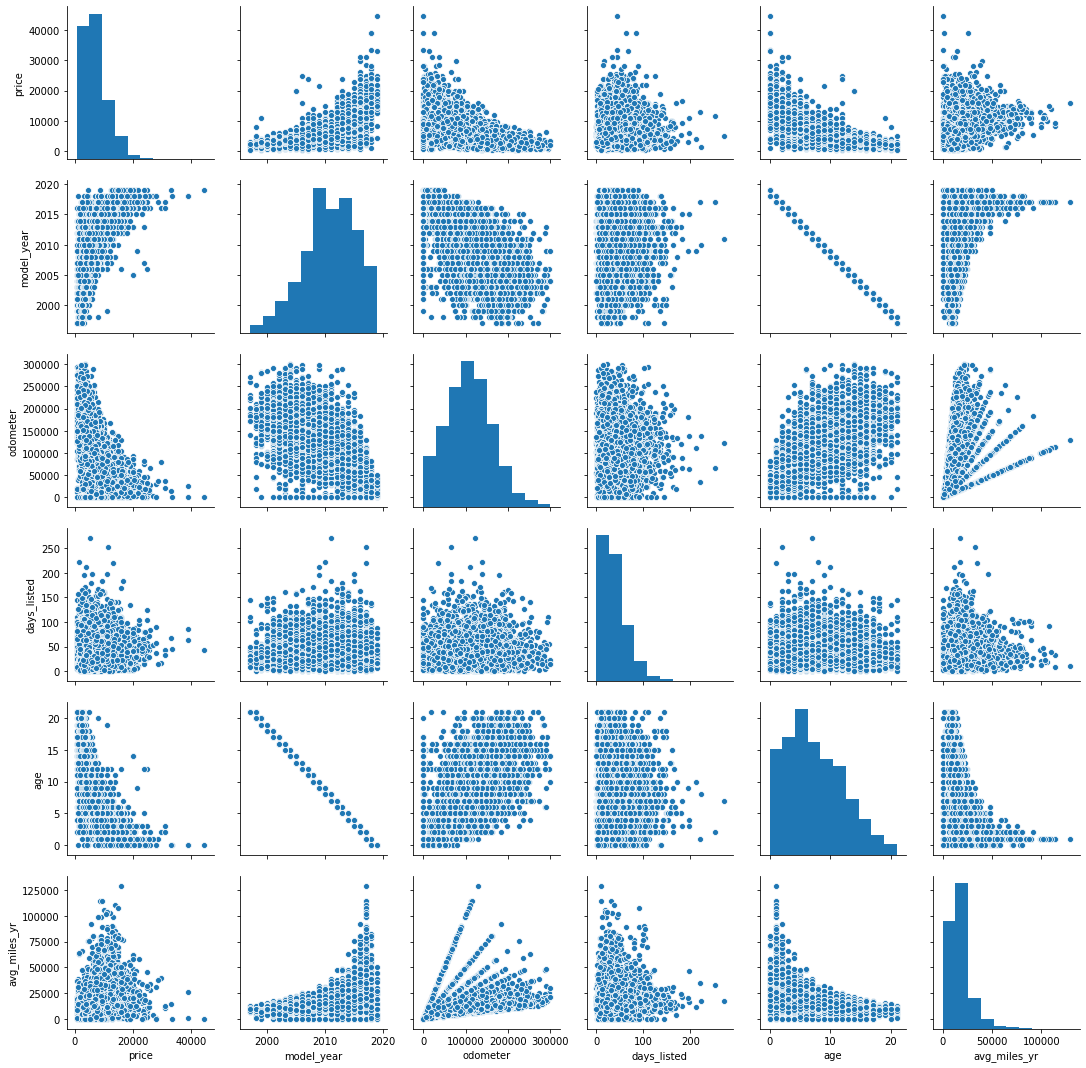

In [100]:
sedan_pairplot = sedan.drop(['year_posted', 'condition', 'month_posted', 'weekday_posted', 'cylinders', 'is_4wd', 'weekday_posted'], 1)
sns.pairplot(sedan_pairplot);

Pretty similar picture here. Just sedans with less average miles a year cost less in comparison to SUV's. Distributions here are slightly different, but general conclusions are pretty similar to those I made for SUV's. 

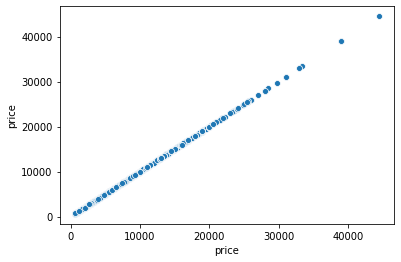

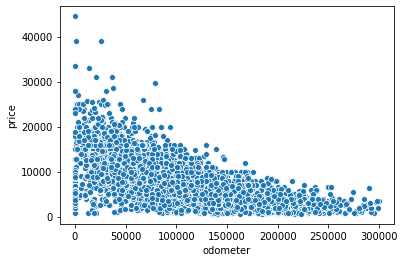

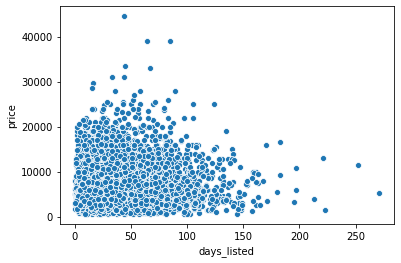

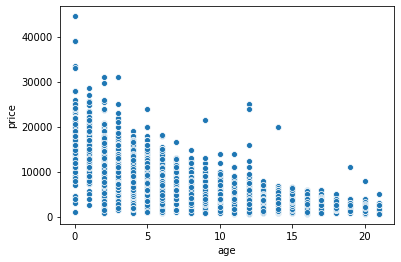

In [101]:
for i in sedan.drop(['year_posted', 'month_posted', 'condition', 'weekday_posted', 'model_year', 'model', 'is_4wd', 'cylinders', 'avg_miles_yr'], 1)._get_numeric_data().columns:
    sns.scatterplot(data=sedan, x=sedan[i], y="price")
    plt.show()

Odometer and age - as expected, again, newer are cheaper. Why longer listed cars still have some slight tendency to be cheaper.

In [102]:
print (sedan['price'].median(), suv['price'].median() )

5995.0 8990.0


Sedans and SUVs median prices are expectedly different.

The 'condition' column represents sellers personal opinions on what their car condition is. Most likely large portion of them are overestimating their property in comparison to what independent audit results could be, and that's understandable, negotiation is an essential part of trade. So it would be correctly to say we are estimating dependence of owners opinion about their cars condition and car price. Most likely, some portion of this opinions is realistic, but I don't have enough data here, to research it.

So, price depends the most on odometer, age and condition. Other values show just some, mostly insignificant correlations described above.

### Step 5. Overall conclusion

Predictably, price depends the most on odometer, age, condition, and model year, though correlations are not very strong. 
Positive correlation with model year, age and odometer values show negative correlation with price. Better condition shows positive correlation with price. 

Insignificant, but odd correlation between days listed and price discovered, I didn't find an answer why exactly they seem intertwined in such a way. The dataset was messed up, which is, I assume, sort of normal situation for set of ads, but in real life situation I could have access to more information to draw more accurate conclusions.  